In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/optiver-trading-at-the-close/public_timeseries_testing_util.py
/kaggle/input/optiver-trading-at-the-close/train.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv
/kaggle/input/optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/optiver-trading-at-the-close/optiver2023/__init__.py


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/optiver-trading-at-the-close/public_timeseries_testing_util.py
/kaggle/input/optiver-trading-at-the-close/train.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv
/kaggle/input/optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/optiver-trading-at-the-close/optiver2023/__init__.py


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/kaggle/input/optiver-trading-at-the-close/train.csv')

In [7]:
test=pd.read_csv('/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv')

In [8]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [12]:
df.shape

(5237980, 17)

In [13]:
pd.set_option('display.max_rows', 10000)

 # **Dealing with NA values**

In [14]:
df1=df

In [15]:
df1.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [16]:
df1['far_price'].fillna(method='ffill', inplace=True)




In [17]:
df1['far_price'].fillna(method='bfill', inplace=True)

In [18]:
df1['near_price'].fillna(method='ffill', inplace=True)

In [19]:
df1['near_price'].fillna(method='bfill', inplace=True)

In [20]:
df1.isna().sum()

stock_id                     0
date_id                      0
seconds_in_bucket            0
imbalance_size             220
imbalance_buy_sell_flag      0
reference_price            220
matched_size               220
far_price                    0
near_price                   0
bid_price                  220
bid_size                     0
ask_price                  220
ask_size                     0
wap                        220
target                      88
time_id                      0
row_id                       0
dtype: int64

In [21]:
df1.shape

(5237980, 17)

In [22]:
df1=df1.dropna(how='any')

In [23]:
df1['time_id'].unique()

array([    0,     1,     2, ..., 26452, 26453, 26454])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5237760 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 719.3+ MB


# **Feature Engineering**

In [25]:

df1['timestamp'] = df1['date_id'] * 100000 + df1['seconds_in_bucket']
df1['hour'] = (df1['timestamp'] // 100000) % 24
df1['minute'] = (df1['timestamp'] // 1000) % 60
df1['second'] = df1['timestamp'] % 1000


df1['imbalance_ratio'] = df1['imbalance_size'] / df1['matched_size']


df1['spread'] = df1['ask_price'] - df1['bid_price']
df1['spread_percent'] = (df1['ask_price'] - df1['bid_price']) / df1['bid_price']


df1['bid_price_deviation'] = df1['bid_price'] - df1['reference_price']
df1['ask_price_deviation'] = df1['ask_price'] - df1['reference_price']


df1['bid_ask_price_ratio'] = df1['bid_price'] / df1['ask_price']
df1['wap_reference_price_ratio'] = df1['wap'] / df1['reference_price']

df1['vwap'] = df1.groupby(['stock_id', 'time_id'])['wap'].transform('mean')


df1['bid_ask_size_ratio'] = df1['bid_size'] / df1['ask_size']


df1['rolling_mean_wap'] = df1.groupby('time_id')['wap'].transform(lambda x: x.rolling(window=10).mean())


df1['price_change'] = df1['wap'].diff()
df1['rolling_volatility'] = df1.groupby('stock_id')['price_change'].rolling(window=10).std().reset_index()['price_change']


df1['spread_change'] = df1['spread'].diff()

df1['order_book_depth'] = df1['bid_size'] + df1['ask_size']
df1['order_book_ratio'] = df1['bid_size'] / (df1['bid_size'] + df1['ask_size'])


df1['cumulative_volume'] = df1.groupby('time_id')['matched_size'].cumsum()


df1['relative_bid_size'] = df1['bid_size'] / df1.groupby('time_id')['bid_size'].transform('sum')

df1['price_velocity'] = df1['wap'].pct_change()


df1['cross_product'] = df1['bid_size'] * df1['ask_size']

df1['bid_price_to_vwap_ratio'] = df1['bid_price'] / df1['vwap']


df1['market_order_ratio'] = df1['imbalance_buy_sell_flag'] / (df1['bid_size'] + df1['ask_size'])


df1['average_price_past_5_periods'] = df1.groupby('stock_id')['wap'].rolling(window=5).mean().reset_index()['wap']


In [26]:
df1.isna().sum()

stock_id                             0
date_id                              0
seconds_in_bucket                    0
imbalance_size                       0
imbalance_buy_sell_flag              0
reference_price                      0
matched_size                         0
far_price                            0
near_price                           0
bid_price                            0
bid_size                             0
ask_price                            0
ask_size                             0
wap                                  0
target                               0
time_id                              0
row_id                               0
timestamp                            0
hour                                 0
minute                               0
second                               0
imbalance_ratio                      0
spread                               0
spread_percent                       0
bid_price_deviation                  0
ask_price_deviation      

In [27]:

df1['rolling_mean_wap'].fillna(df1['rolling_mean_wap'].mean(), inplace=True)


df1['price_change'].fillna(method='ffill', inplace=True)
df1['rolling_volatility'].fillna(method='bfill', inplace=True)


df1['spread_change'].fillna(method='ffill', inplace=True)
df1['price_velocity'].fillna(method='ffill', inplace=True)



In [28]:


df1['average_price_past_5_periods'].fillna(df1['average_price_past_5_periods'].mean(), inplace=True)



In [29]:
df1.isna().sum()

stock_id                          0
date_id                           0
seconds_in_bucket                 0
imbalance_size                    0
imbalance_buy_sell_flag           0
reference_price                   0
matched_size                      0
far_price                         0
near_price                        0
bid_price                         0
bid_size                          0
ask_price                         0
ask_size                          0
wap                               0
target                            0
time_id                           0
row_id                            0
timestamp                         0
hour                              0
minute                            0
second                            0
imbalance_ratio                   0
spread                            0
spread_percent                    0
bid_price_deviation               0
ask_price_deviation               0
bid_ask_price_ratio               0
wap_reference_price_ratio   

In [31]:
df1=df1.dropna(how='any')

In [35]:
df1.isna().sum().to_frame()

,0
stock_id,0
date_id,0
seconds_in_bucket,0
imbalance_size,0
imbalance_buy_sell_flag,0
reference_price,0
matched_size,0
far_price,0
near_price,0
bid_price,0


In [54]:
import sweetviz as sv
import dtale

ModuleNotFoundError: No module named 'sweetviz'

In [40]:
df1.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,spread_change,order_book_depth,order_book_ratio,cumulative_volume,relative_bid_size,price_velocity,cross_product,bid_price_to_vwap_ratio,market_order_ratio,average_price_past_5_periods
count,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,...,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06,5.237539e+06
mean,9.928810e+01,2.414977e+02,2.699887e+02,5.715449e+06,-1.188650e-02,9.999956e-01,4.510001e+07,1.000768e+00,9.998580e-01,9.997263e-01,...,-2.787569e-11,1.053812e+05,4.927529e-01,4.209722e+09,5.050825e-03,4.098696e-06,6.785946e+09,9.997344e-01,-1.082832e-06,9.999920e-01
std,5.787182e+01,1.385249e+02,1.587388e+02,2.051630e+07,8.853487e-01,2.532503e-03,1.398425e+08,4.826766e-01,8.437265e-03,2.499346e-03,...,8.039801e-04,1.927850e+05,2.897632e-01,4.582780e+09,8.800771e-03,2.863438e-03,7.569866e+10,3.656652e-04,1.498369e-04,2.429446e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,...,-1.790800e-02,1.281000e+01,3.211360e-05,4.161774e+06,3.558897e-08,-7.154754e-02,7.442000e+00,9.856233e-01,-5.194805e-02,9.415968e-01
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.454031e+04,-1.000000e+00,9.987630e-01,5.279453e+06,9.976790e-01,9.980380e-01,9.985290e-01,...,-2.740000e-04,2.434890e+04,2.511211e-01,1.559891e+09,8.288708e-04,-1.381935e-03,6.218693e+07,9.996724e-01,-1.342305e-05,9.988060e-01
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113636e+06,0.000000e+00,9.999670e-01,1.288225e+07,9.999910e-01,9.999850e-01,9.997280e-01,...,-6.000000e-06,5.267406e+04,4.973360e-01,3.319369e+09,2.385582e-03,0.000000e+00,3.753447e+08,9.998462e-01,0.000000e+00,9.999620e-01
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.191109e+06,1.000000e+00,1.001174e+00,3.269954e+07,1.001993e+00,1.001817e+00,1.000905e+00,...,2.700000e-04,1.151352e+05,7.299222e-01,5.537111e+09,5.696121e-03,1.378490e-03,2.096179e+09,9.999321e-01,1.220239e-05,1.001127e+00
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,...,1.785400e-02,5.486845e+07,9.999729e-01,7.784533e+10,8.425390e-01,6.708663e-02,5.291171e+13,1.000000e+00,7.806401e-02,1.074227e+00


# **Exploratory Data Analysis**

In [ ]:
2+2

<Axes: >

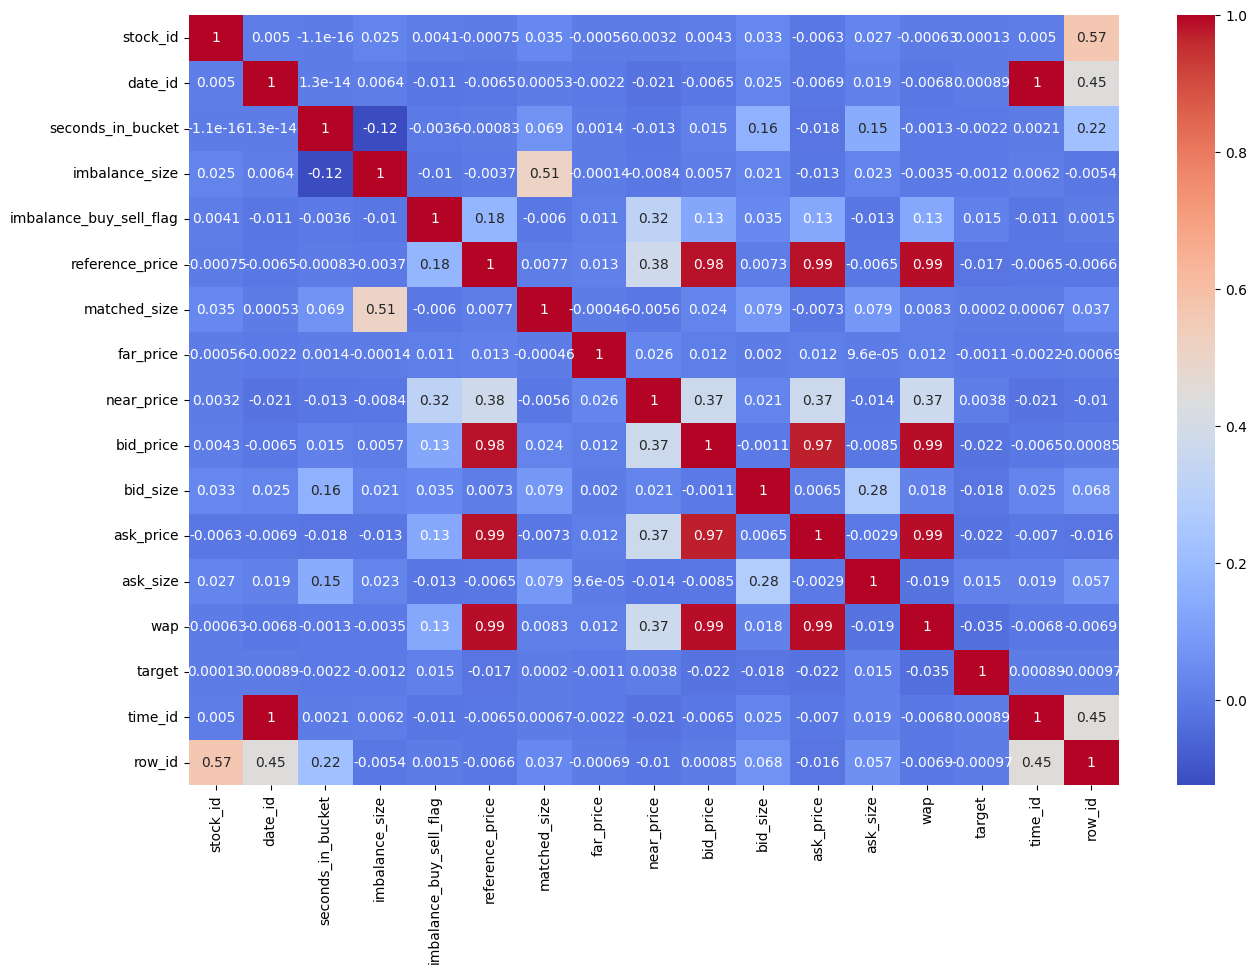

In [32]:

fig, ax = plt.subplots(figsize=(15,10))        
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

<Axes: >

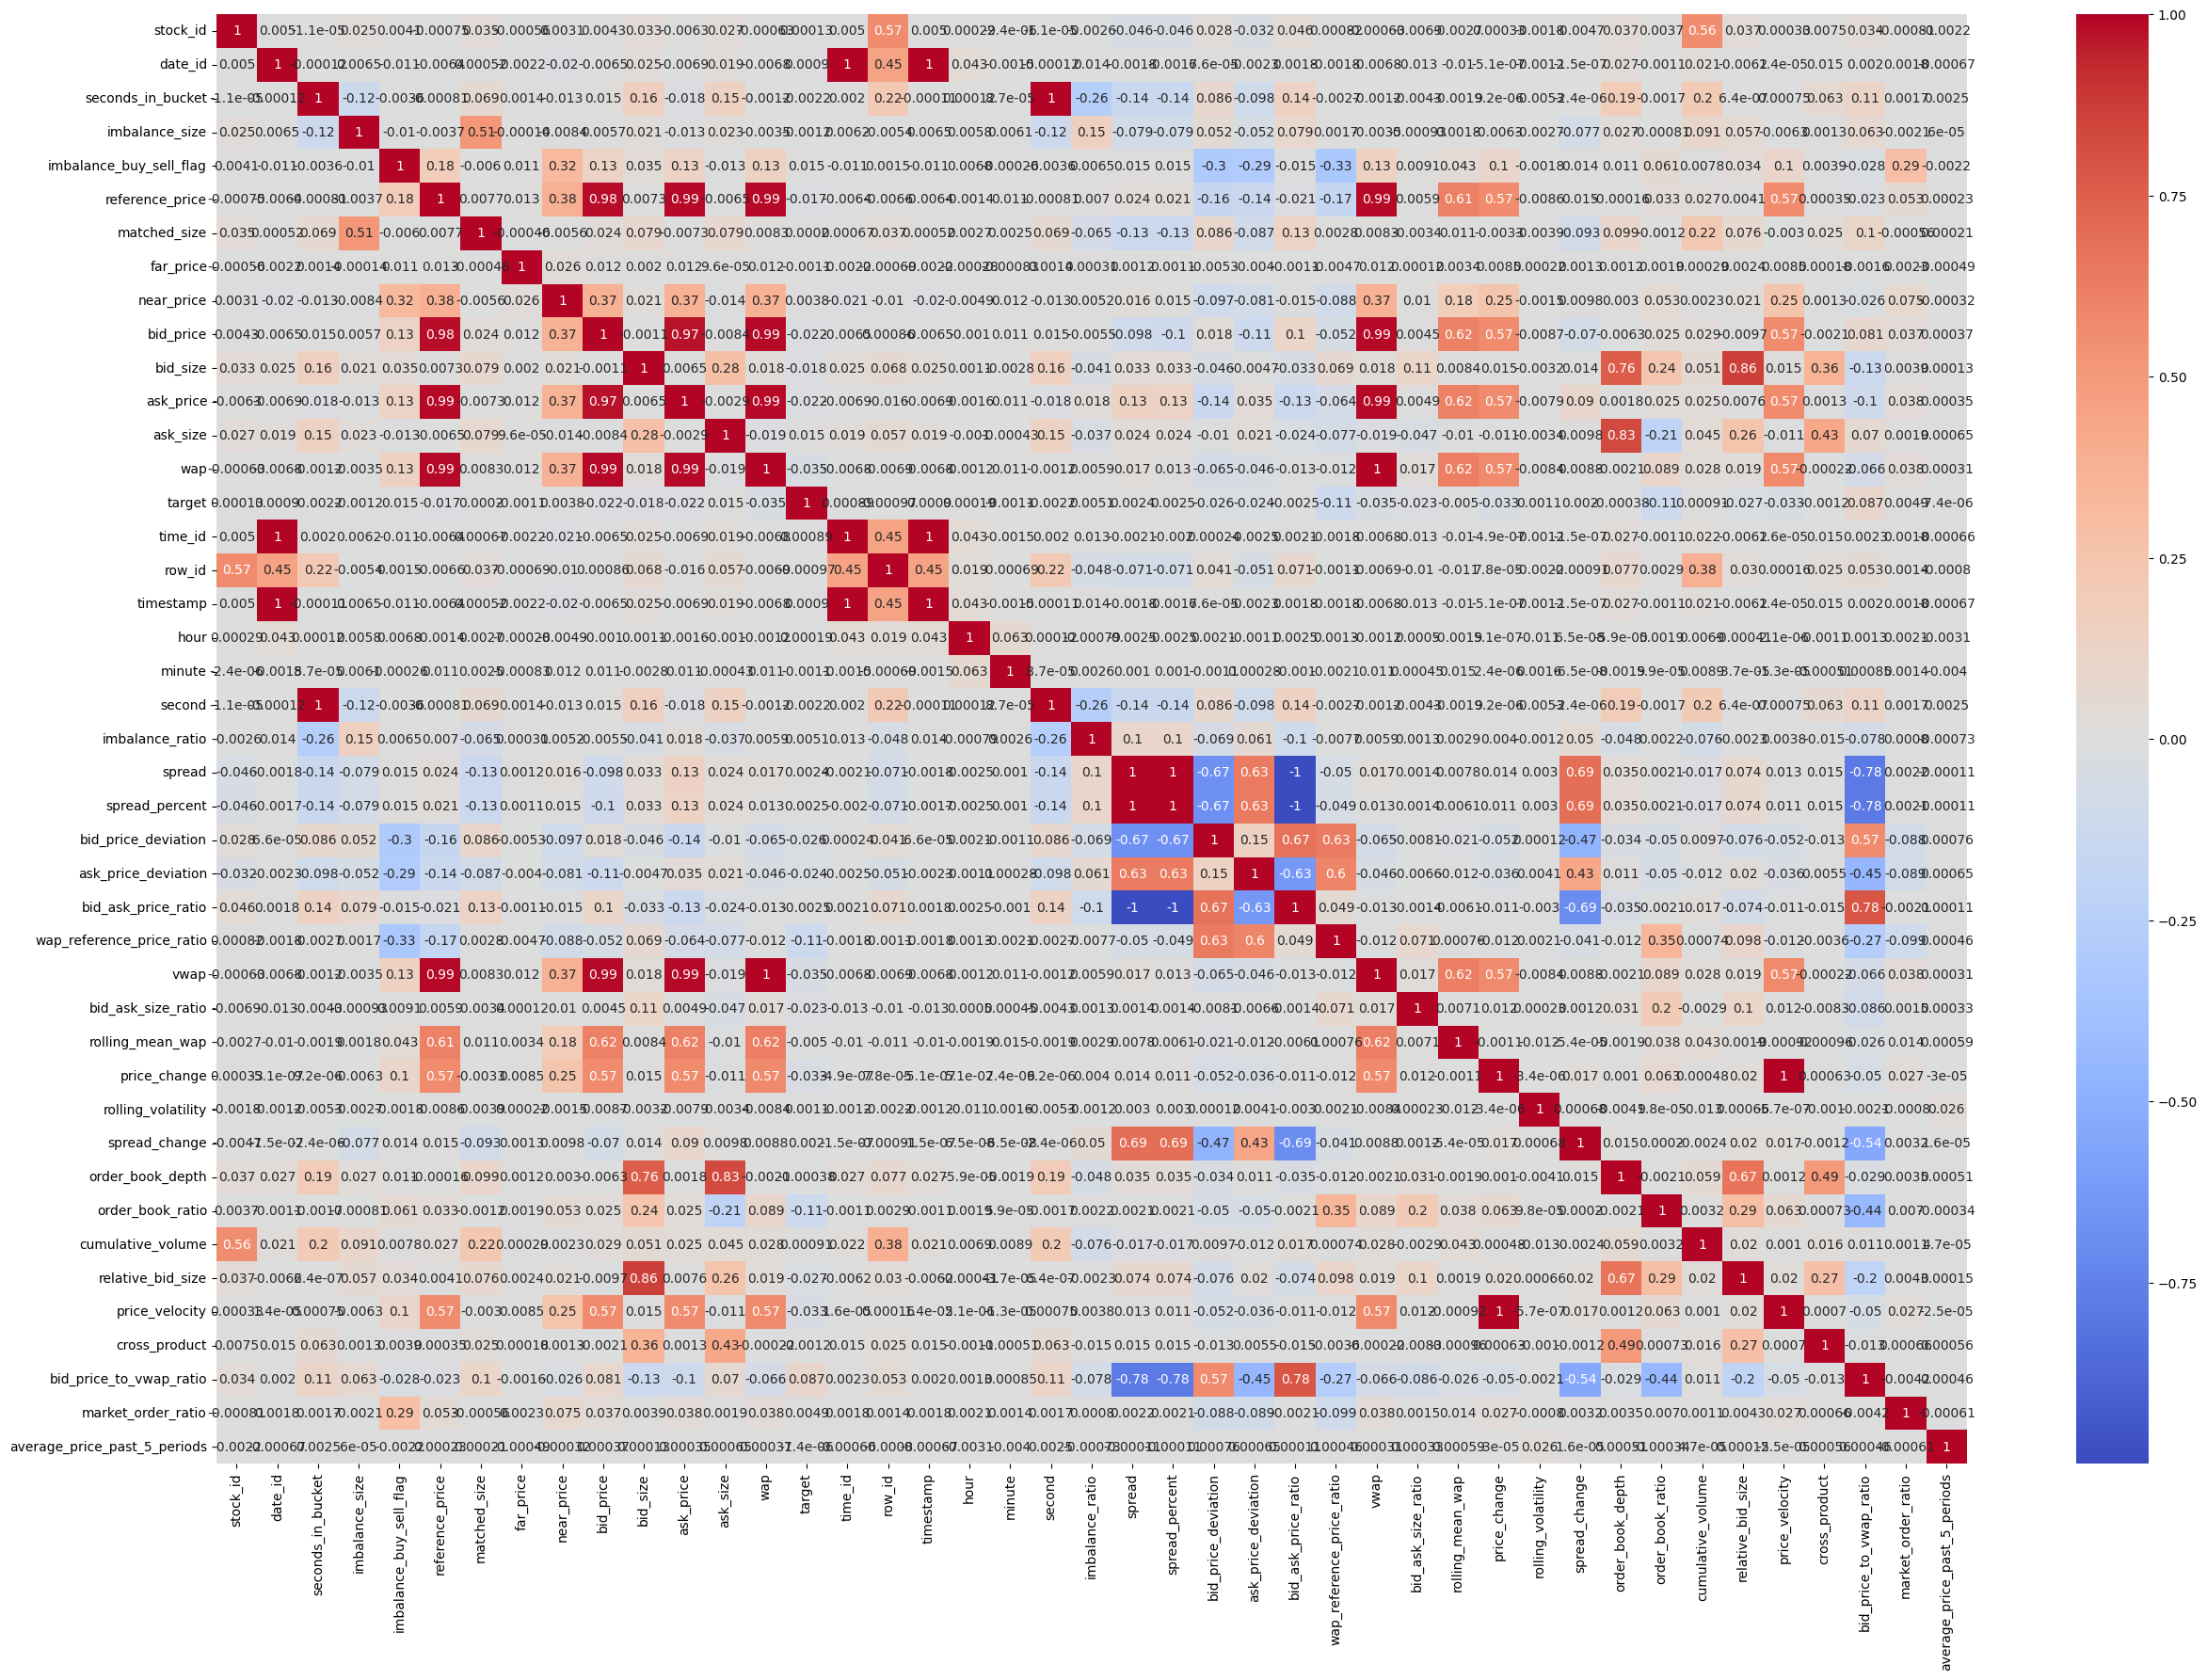

In [33]:
fig, ax = plt.subplots(figsize=(30,20))        
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='imbalance_size'>

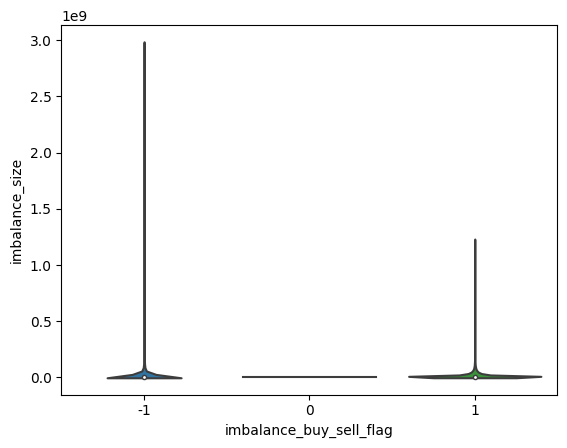

In [41]:
sns.violinplot(x='imbalance_buy_sell_flag', y='imbalance_size', data=df1)


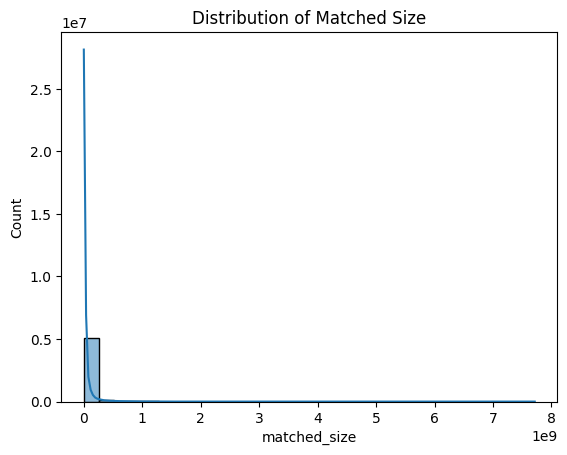

In [43]:
sns.histplot(df["matched_size"], bins=30, kde=True)
plt.title("Distribution of Matched Size")
plt.show()


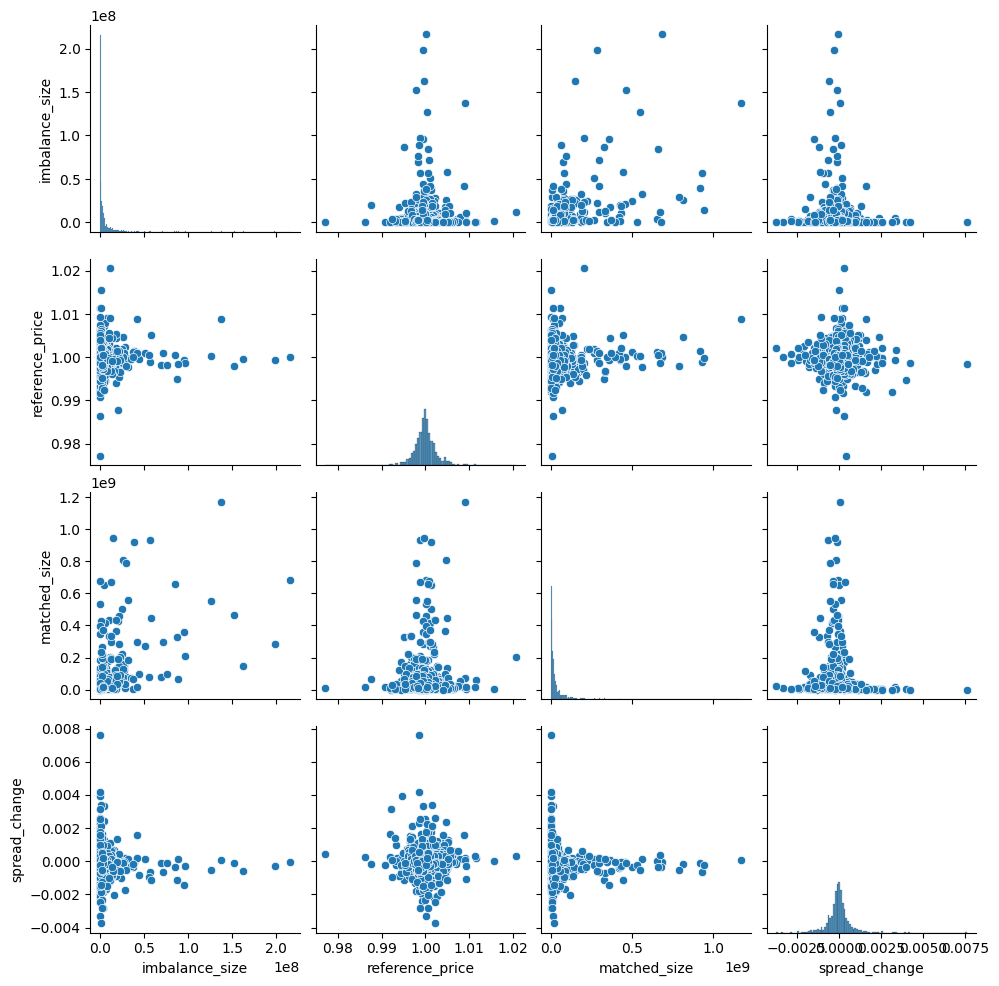

In [44]:
sns.pairplot(df1.sample(1000), vars=["imbalance_size", "reference_price", "matched_size", "spread_change"])
plt.show()


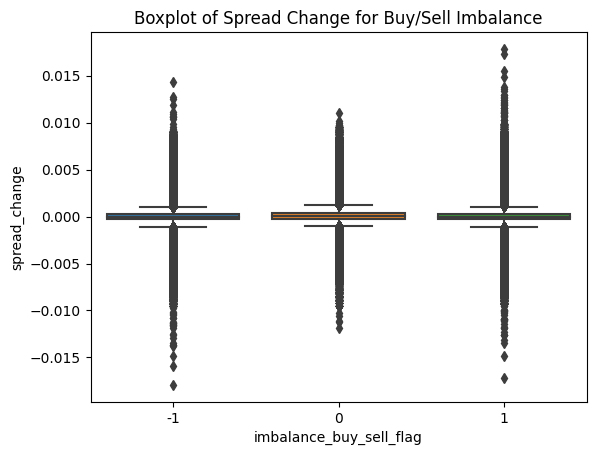

In [45]:
sns.boxplot(x="imbalance_buy_sell_flag", y="spread_change", data=df1)
plt.title("Boxplot of Spread Change for Buy/Sell Imbalance")
plt.show()


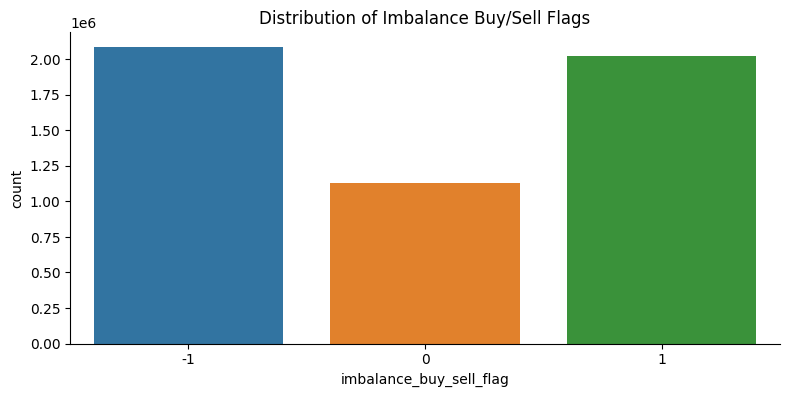

In [46]:
sns.catplot(x="imbalance_buy_sell_flag", kind="count", data=df1, height=4, aspect=2)
plt.title('Distribution of Imbalance Buy/Sell Flags')
plt.show()



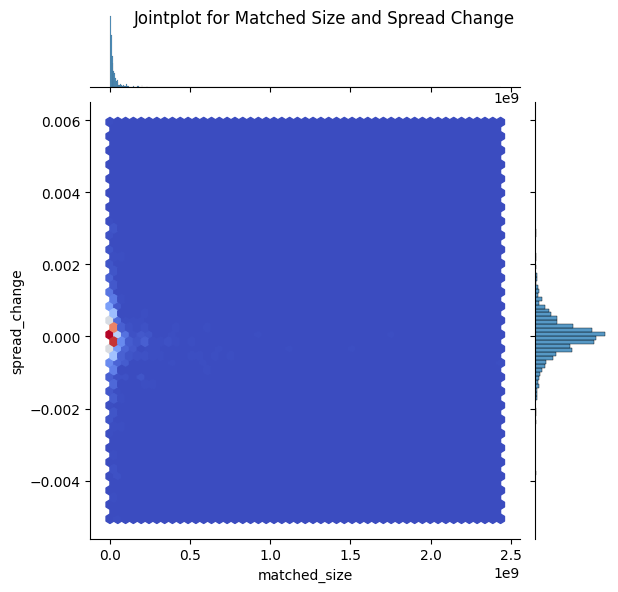

In [47]:
sns.jointplot(x="matched_size", y="spread_change", data=df1.sample(1000), kind="hex", cmap="coolwarm")
plt.suptitle('Jointplot for Matched Size and Spread Change')
plt.show()


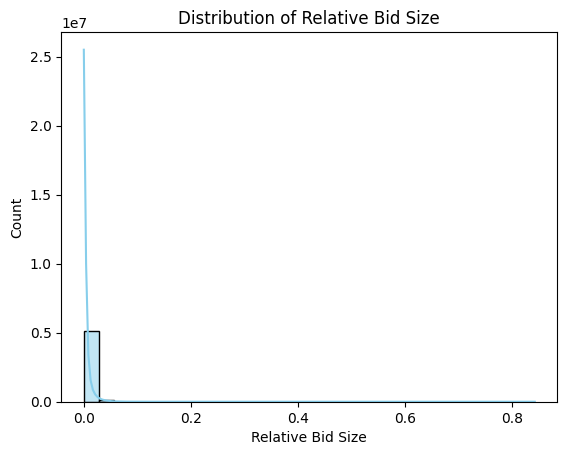

In [48]:
sns.histplot(df1['relative_bid_size'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Relative Bid Size')
plt.xlabel('Relative Bid Size')
plt.show()


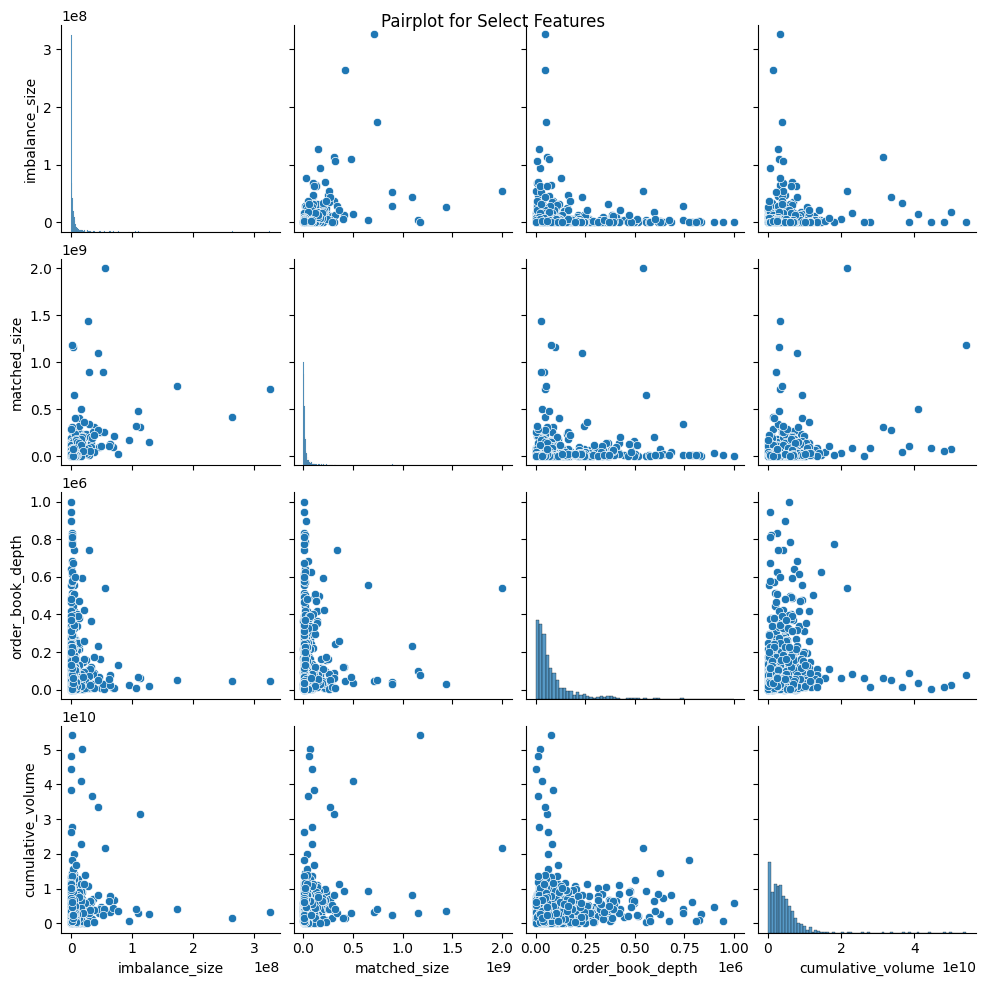

In [49]:
selected_features = ['imbalance_size', 'matched_size', 'order_book_depth', 'cumulative_volume']
sns.pairplot(df1.sample(1000)[selected_features])
plt.suptitle('Pairplot for Select Features')
plt.show()


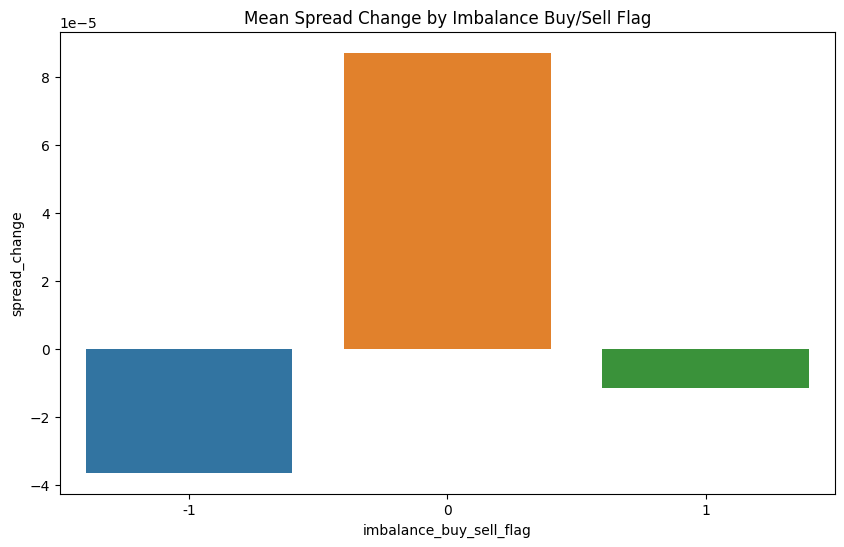

In [50]:
grouped_df1 = df1.groupby('imbalance_buy_sell_flag').agg({
    'spread_change': 'mean',
    'order_book_depth': 'mean',
    'cumulative_volume': 'sum'
}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='imbalance_buy_sell_flag', y='spread_change', data=grouped_df1)
plt.title('Mean Spread Change by Imbalance Buy/Sell Flag')
plt.show()


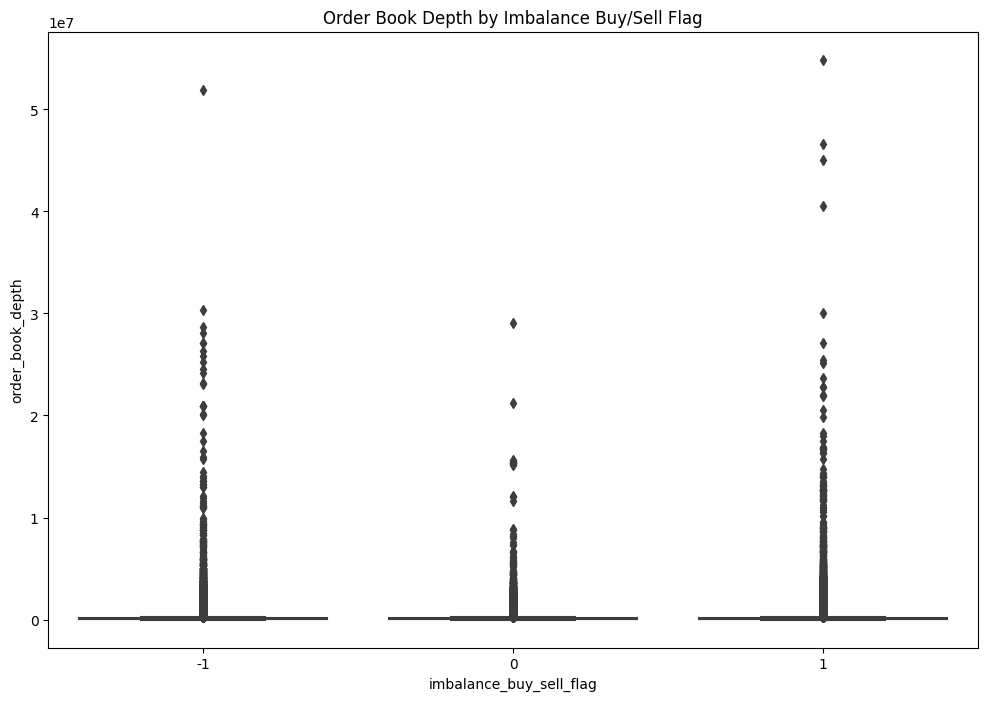

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='imbalance_buy_sell_flag', y='order_book_depth', data=df1)
plt.title('Order Book Depth by Imbalance Buy/Sell Flag')
plt.show()

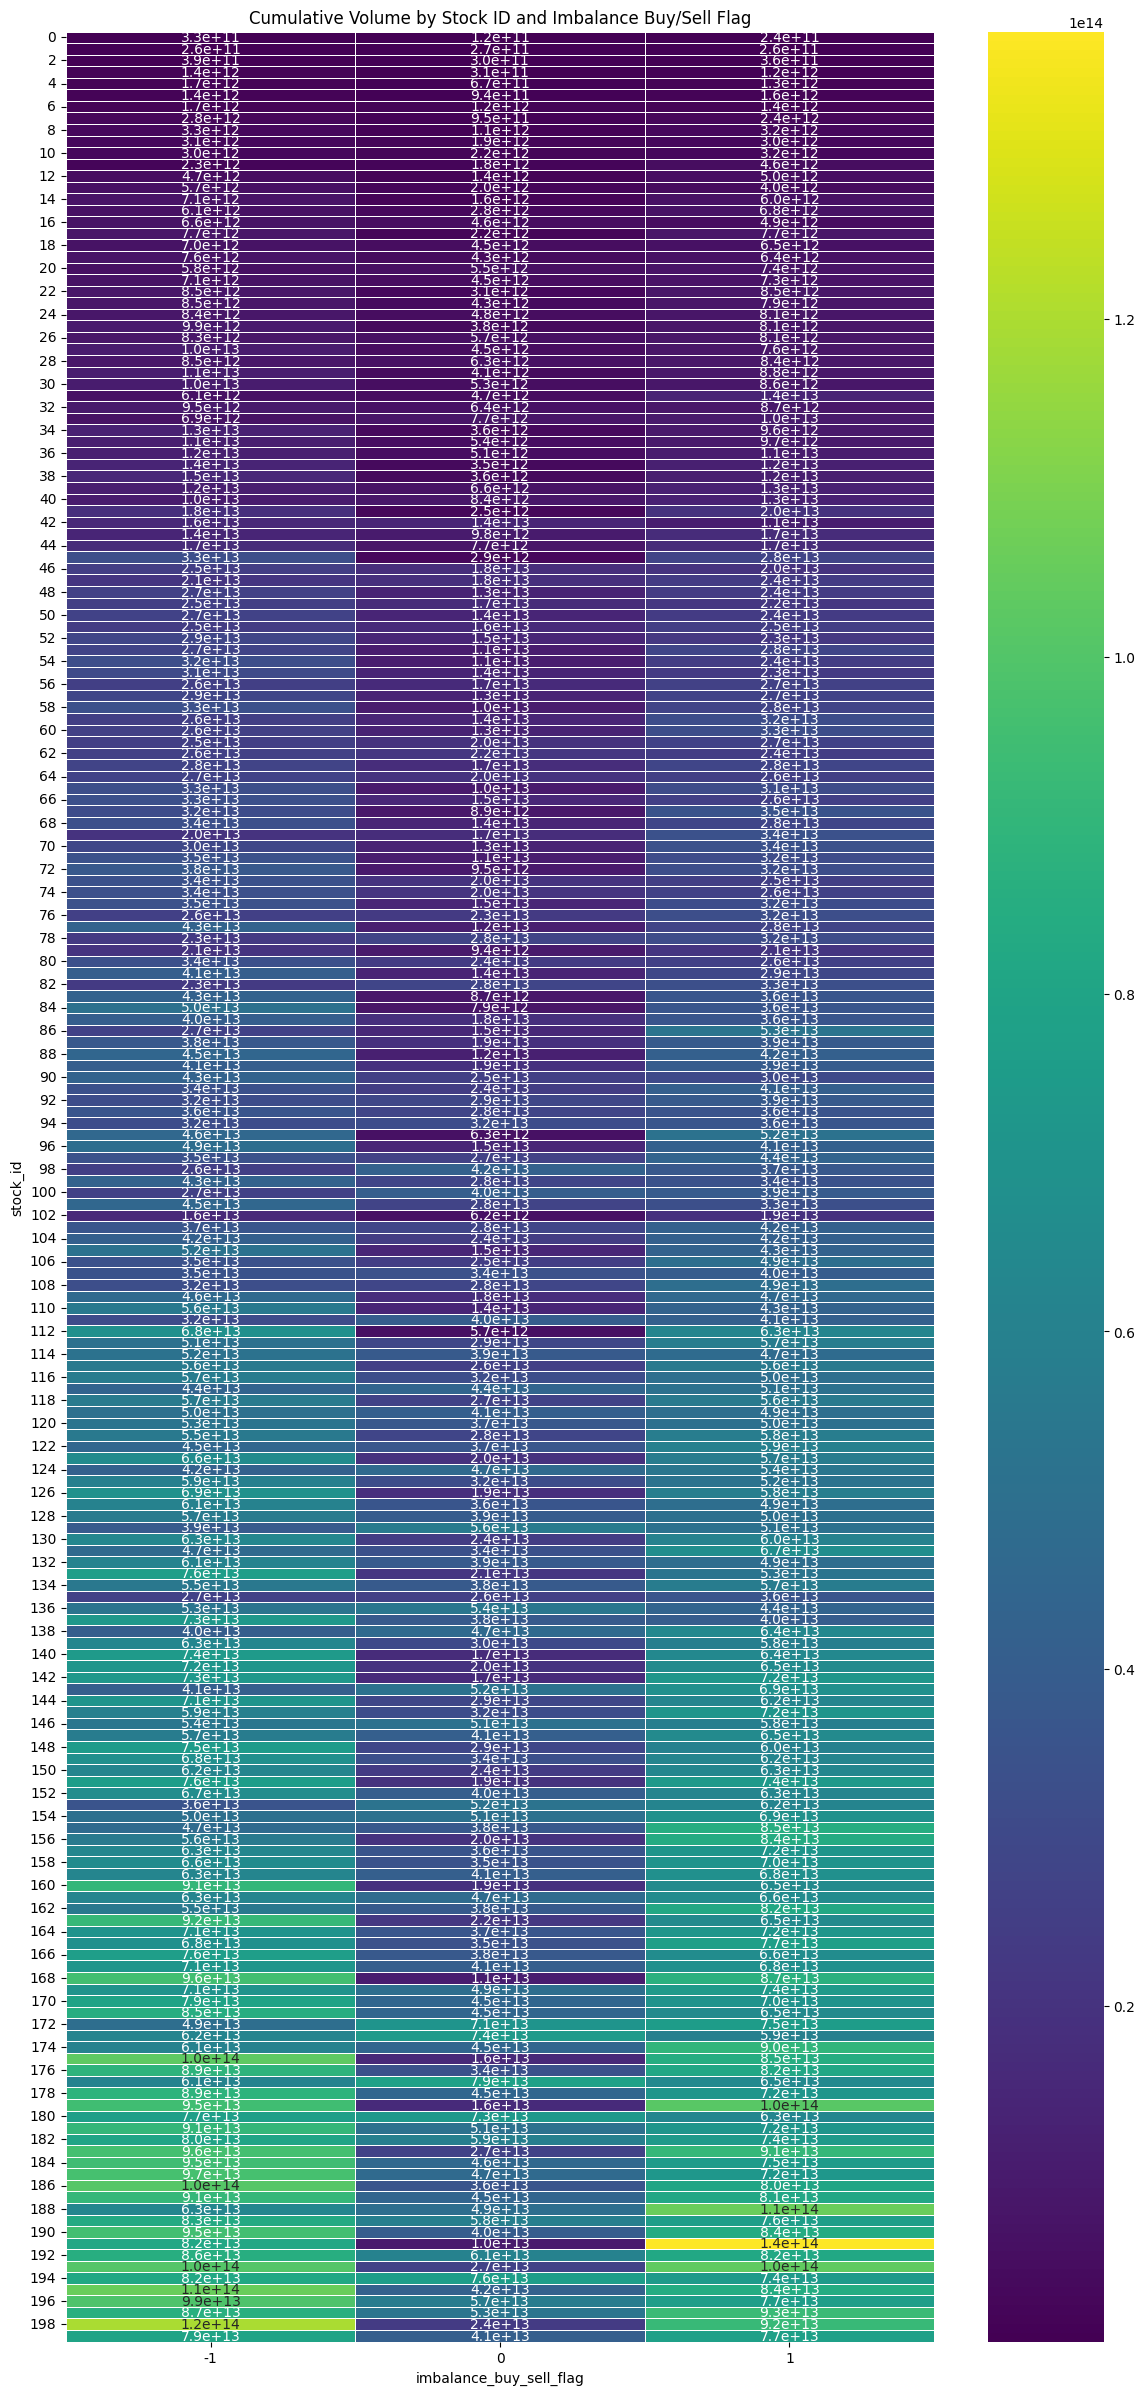

In [45]:
pivot_df1 = df1.pivot_table(index='stock_id', columns='imbalance_buy_sell_flag', values='cumulative_volume', aggfunc='sum')
plt.figure(figsize=(14, 30))
sns.heatmap(pivot_df1, cmap='viridis', annot=True, fmt=".1e", linewidths=.5)
plt.title('Cumulative Volume by Stock ID and Imbalance Buy/Sell Flag')
plt.show()

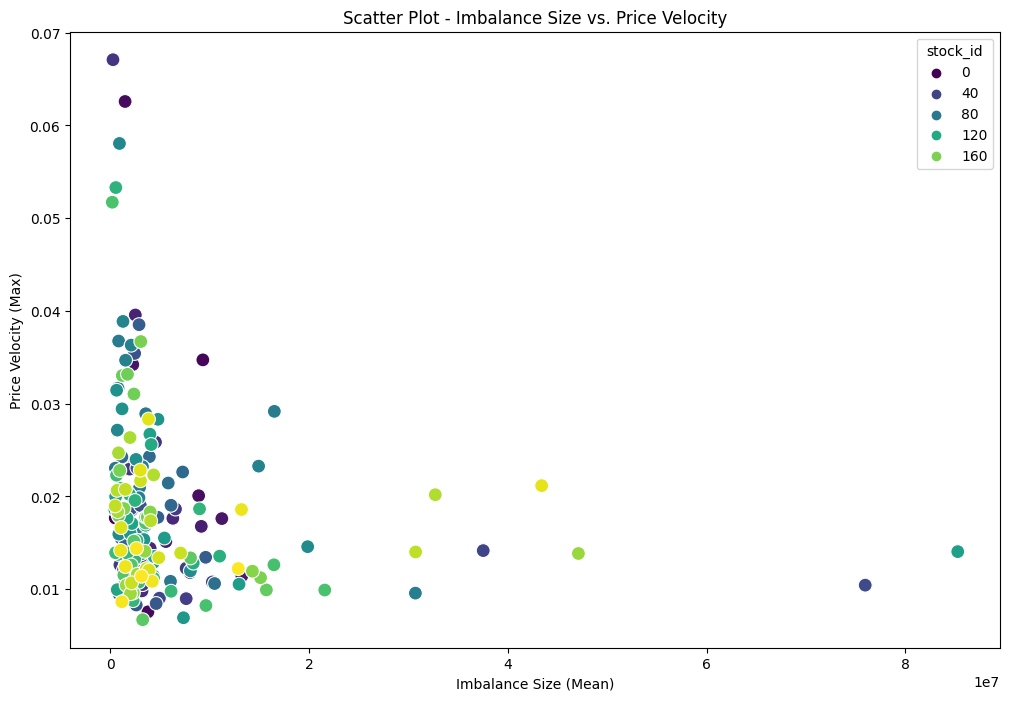

In [52]:
grouped_df2 = df1.groupby('stock_id').agg({
    'imbalance_size': 'mean',
    'price_velocity': 'max',
    'cross_product': 'sum'
}).reset_index()

# Scatter Plot for Imbalance Size vs. Price Velocity
plt.figure(figsize=(12, 8))
sns.scatterplot(x='imbalance_size', y='price_velocity', hue='stock_id', data=grouped_df2, palette='viridis', s=100)
plt.title('Scatter Plot - Imbalance Size vs. Price Velocity')
plt.xlabel('Imbalance Size (Mean)')
plt.ylabel('Price Velocity (Max)')
plt.show()


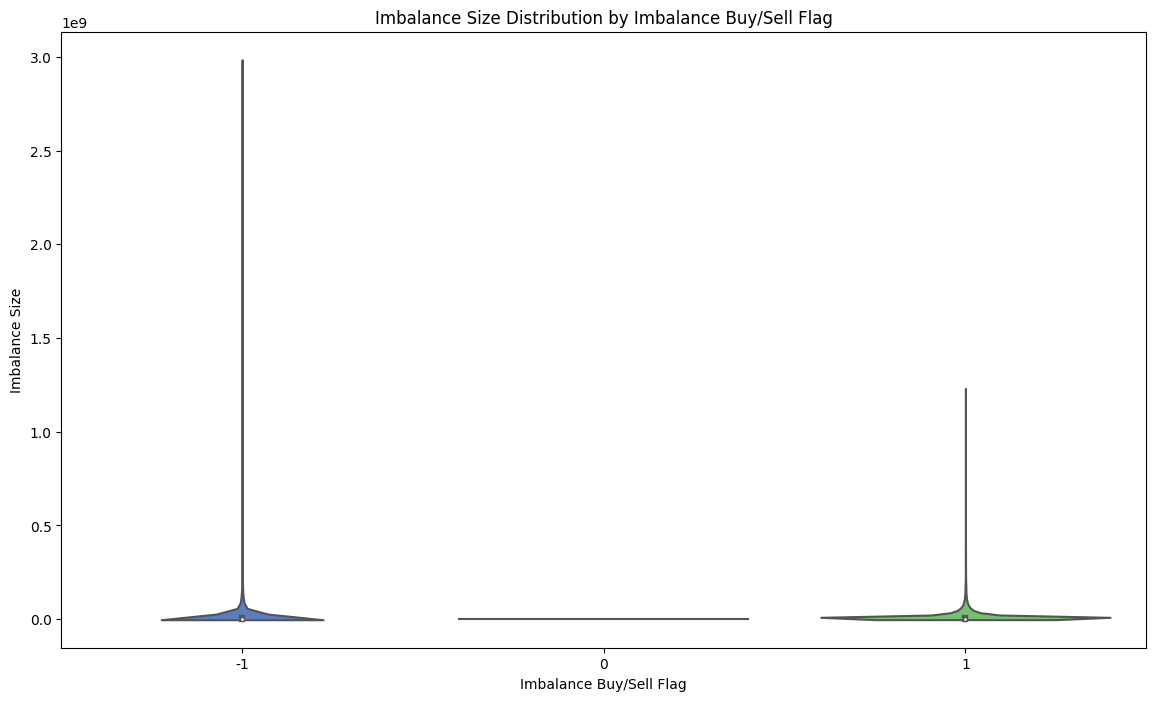

In [53]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='imbalance_buy_sell_flag', y='imbalance_size', data=df, palette='muted')
plt.title('Imbalance Size Distribution by Imbalance Buy/Sell Flag')
plt.xlabel('Imbalance Buy/Sell Flag')
plt.ylabel('Imbalance Size')
plt.show()

# **Train Test split**

In [32]:
x = df1.drop(['target'], axis=1)
y = df1[['target']]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train)

Y_test_scaled = scaler.transform(Y_test)

# **Feature Selection**

In [50]:
import xgboost as xgb

In [51]:

dtrain = xgb.DMatrix(X_train_scaled, label=Y_train)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'booster': 'gbtree',
    'verbosity': 0
}

In [52]:

xgb_model = xgb.train(params, dtrain, num_boost_round=100)



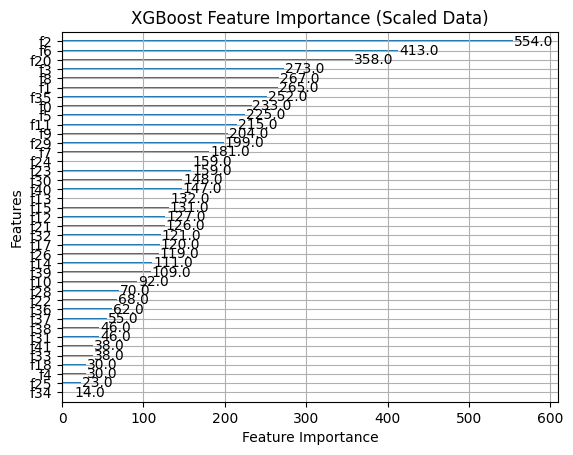

In [53]:

xgb.plot_importance(xgb_model,importance_type='weight', xlabel='Feature Importance', ylabel='Features', title='XGBoost Feature Importance (Scaled Data)')
plt.show()

In [54]:
feature_importance = xgb_model.get_score(importance_type='weight')

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)


top_k_features = [feature[0] for feature in sorted_features[:43]]


In [55]:
original_feature_names = df1.columns

mapping_dict = {f'f{i}': original_feature_names[i] for i in range(len(original_feature_names))}


original_top_k_features = [mapping_dict[encoded_name] for encoded_name in top_k_features]


print(original_top_k_features)

['seconds_in_bucket', 'matched_size', 'second', 'imbalance_size', 'near_price', 'date_id', 'order_book_ratio', 'stock_id', 'reference_price', 'ask_price', 'bid_price', 'bid_ask_size_ratio', 'far_price', 'spread_percent', 'bid_price_deviation', 'rolling_mean_wap', 'bid_price_to_vwap_ratio', 'wap', 'time_id', 'ask_size', 'imbalance_ratio', 'rolling_volatility', 'timestamp', 'bid_ask_price_ratio', 'target', 'cross_product', 'bid_size', 'vwap', 'spread', 'cumulative_volume', 'relative_bid_size', 'price_change', 'price_velocity', 'spread_change', 'market_order_ratio', 'imbalance_buy_sell_flag', 'hour', 'ask_price_deviation', 'order_book_depth']


# **Running models**

In [56]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor()


xgb_model.fit(X_train_scaled, Y_train_scaled.ravel())


xgb_predictions = xgb_model.predict(X_test_scaled)


xgb_predictions_original_scale = scaler.inverse_transform(xgb_predictions.reshape(-1, 1))


xgb_mse = mean_squared_error(Y_test, xgb_predictions_original_scale)
xgb_mae=mean_absolute_error(Y_test, xgb_predictions_original_scale)
print(f'XGBoost Mean Squared Error: {xgb_mse}')
print(f'XGBoost Mean absolute Error: {xgb_mae}')

XGBoost Mean Squared Error: 83.6432319953492
XGBoost Mean absolute Error: 6.243513840142502


In [ ]:
import lightgbm as lgb


lgb_model = lgb.LGBMRegressor()


lgb_model.fit(X_train_scaled, Y_train_scaled.ravel())


lgb_predictions = lgb_model.predict(X_test_scaled)


lgb_predictions_original_scale = scaler.inverse_transform(lgb_predictions.reshape(-1, 1))


lgb_mse = mean_squared_error(Y_test, lgb_predictions_original_scale)
lgb_mae= mean_absolute_error(Y_test, lgb_predictions_original_scale)
print(f'LightGBM Mean Squared Error: {lgb_mse}')
print(f'LightGBM Mean absolute Error: {lgb_mae}')

In [ ]:
from catboost import CatBoostRegressor


catboost_model = CatBoostRegressor()


catboost_model.fit(X_train_scaled, Y_train_scaled.ravel())


catboost_predictions = catboost_model.predict(X_test_scaled)




catboost_mse = mean_squared_error(Y_test, catboost_predictions)
print(f'CatBoost Mean Squared Error: {catboost_mse}')
print(f'CatBoost Mean Absolute Error: {mean_absolute_error(Y_test, catboost_predictions)}')

In [ ]:

# X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
# X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# scaler_y = StandardScaler()
# y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1)).flatten()


In [ ]:
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model.add(Dense(1))  # Output layer with 1 neuron for regression
# model.compile(optimizer='adam', loss='mean_squared_error')


# model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


# y_pred_scaled = model.predict(X_test_reshaped)


# y_pred = scaler_y.inverse_transform(y_pred_scaled)



**Mean Squared Error (MSE): 85.97699337181757(Ran the model overnight)**

In [ ]:

# mse = mean_squared_error(Y_test, y_pred)
# print(f'Mean Squared Error (MSE): {mse}')

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


model = LinearRegression()
model.fit(X_train_poly_scaled, Y_train)


Y_pred = model.predict(X_test_poly_scaled)


mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, Y_train_scaled)
linear_reg_pred = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(Y_test_scaled, linear_reg_pred)
linear_reg_mae=mean_absolute_error(Y_test_scaled, linear_reg_pred)
print(f'Linear Regression MSE: {linear_reg_mse}')
print(f'Linear Regression MAE: {linear_reg_mae}')

**SVR ENSEMBLE**

In [1]:
df2=df1.sample(frac=0.001,random_state=200)

In [ ]:
x_svr = df2.drop(['target'], axis=1)
y_svr = df2[['target']]

In [ ]:
X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(x_svr, y_svr, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_svr = scaler.fit_transform(X_train_svr)
X_test_scaled_svr = scaler.transform(X_test_svr)

# Scale the target variable
scaler_y = StandardScaler()
Y_train_scaled_svr = scaler_y.fit_transform(Y_train_svr)
Y_test_scaled_svr = scaler_y.transform(Y_test_svr)

In [1]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso

In [ ]:

start = time.time()
single_svr = SVR(kernel='linear')
single_svr.fit(X_train_scaled_svr, Y_train_scaled_svr)
single_svr_predictions = single_svr.predict(X_test_scaled_svr)
end = time.time()
mse_single_svr = mean_squared_error(Y_test_svr, single_svr_predictions)
print("Single SVR", end - start, "MSE:", mse_single_svr)


n_estimators = 10
bagging_svr = BaggingRegressor(base_estimator=SVR(kernel='linear'),
                               max_samples=1.0 / n_estimators,
                               n_estimators=n_estimators)
bagging_svr.fit(X_train_scaled_svr, Y_train_scaled_svr)
bagging_svr_predictions = bagging_svr.predict(X_test_scaled_svr)
end = time.time()
mse_bagging_svr = mean_squared_error(Y_test_svr, bagging_svr_predictions)
print("Bagging SVR", end - start, "MSE:", mse_bagging_svr)

**Single SVR 0.13008499145507812 MSE: 113.90413147137586 </br>
Bagging SVR 0.19066214561462402 MSE: 115.1109672046465**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())])


param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_svr, Y_train_svr)


best_model = grid_search.best_estimator_


best_model.fit(X_train_svr, Y_train_svr)


predictions = best_model.predict(X_test_svr)
mse = mean_squared_error(Y_test_svr, predictions)
print(f'Mean Squared Error on Test Set: {mse}')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='linear')),
    ('xgb', XGBRegressor(objective='reg:squarederror'))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Lasso())
stacking_regressor.fit(X_train_svr, Y_train_svr)


stacking_predictions = stacking_regressor.predict(X_test_svr)
stacking_mse = mean_squared_error(Y_test_svr, stacking_predictions)
print(f'Mean Squared Error for Stacking Model: {stacking_mse}')

In [ ]:
import joblib

joblib.dump(single_svr, 'single_svr.joblib')
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(stacking_regressor, 'stacking_regressor.joblib')
joblib.dump(bagging_svr, 'bagging_svr.joblib')
joblib.dump(xgb_model, 'xgb_model.joblib')

joblib.dump(lgb_model, 'lgb_model.joblib')

joblib.dump(catboost_model, 'catboost_model.joblib')





In [ ]:
# def preprocess_test(test):

# 
#     test['timestamp'] = test['date_id'] * 100000 + test['seconds_in_bucket']
#     test['hour'] = (test['timestamp'] // 100000) % 24
#     test['minute'] = (test['timestamp'] // 1000) % 60
#     test['second'] = test['timestamp'] % 1000

#     
#     test['imbalance_ratio'] = test['imbalance_size'] / test['matched_size']

#    
#     test['spread'] = test['ask_price'] - test['bid_price']
#     test['spread_percent'] = (test['ask_price'] - test['bid_price']) / test['bid_price']

#     
#     test['bid_price_deviation'] = test['bid_price'] - test['reference_price']
#     test['ask_price_deviation'] = test['ask_price'] - test['reference_price']

#     
#     test['bid_ask_price_ratio'] = test['bid_price'] / test['ask_price']
#     test['wap_reference_price_ratio'] = test['wap'] / test['reference_price']

#     
#     test['vwap'] = test.groupby(['stock_id', 'time_id'])['wap'].transform('mean')

#    
#     test['bid_ask_size_ratio'] = test['bid_size'] / test['ask_size']

#     
#     test['rolling_mean_wap'] = test.groupby('time_id')['wap'].transform(lambda x: x.rolling(window=10).mean())

#    
#     test['price_change'] = test['wap'].diff()
#     test['rolling_volatility'] = test.groupby('stock_id')['price_change'].rolling(window=10).std().reset_index()['price_change']

#     # Bid-Ask Spread Dynamics
#     test['spread_change'] = test['spread'].diff()

#     
#     test['order_book_depth'] = test['bid_size'] + test['ask_size']
#     test['order_book_ratio'] = test['bid_size'] / (test['bid_size'] + test['ask_size'])

#    
#     test['cumulative_volume'] = test.groupby('time_id')['matched_size'].cumsum()

#     
#     test['relative_bid_size'] = test['bid_size'] / test.groupby('time_id')['bid_size'].transform('sum')

#    
#     test['price_velocity'] = test['wap'].pct_change()

#     
#     test['cross_product'] = test['bid_size'] * test['ask_size']

#    
#     test['bid_price_to_vwap_ratio'] = test['bid_price'] / test['vwap']

#     
#     test['market_order_ratio'] = test['imbalance_buy_sell_flag'] / (test['bid_size'] + test['ask_size'])

#    
#     test['average_price_past_5_periods'] = test.groupby('stock_id')['wap'].rolling(window=5).mean().reset_index()['wap']
    
#     return test

In [ ]:
# import optiver2023
# DATA_DIR = "/kaggle/input/optiver-trading-at-the-close/"

In [ ]:
# env = optiver2023.make_env()
# iter_test = env.iter_test()

In [ ]:
# counter = 0
# for (test, revealed_targets, sample_prediction) in iter_test:
#     processed_test = preprocess(test)
#     scaled_test = scaler.fit_transform(preprocess_test)
#     sample_prediction['target'] = lgb_model.predict(scaled_test)
#     env.predict(sample_prediction)
#     counter += 1